## Intro to AI - HW3 - skotecha

<b>Note:</b> The CNN model has been trained using the AWS GPU


#### Read the files from the images.zip and using the HW3_test.csv and HW3_train.csv put them in appropriate folders

Below is the example of for sorting the image files into a new folders depending upon the country that they belong to. The data is received from the HW3_train.csv and HW3_test.csv folders. 

In the example below we are showing the steps of segregaing the test images to the folder 9 (Stockholm, Sweden). The steps performed are

1. Read the data into the dataframe
2. Choose only the data where the landmark_id = 9 and store it in a new dataframe
3. Take the source file i.e. the "images" folder and using the column_id from the HW3_test.csv file and choose the image and put it in a new folder named "9" at the given file path
4. Repeat the same for other landmark_ids and in the end manually move these folders to a new folder called test
5. Repeat the above steps for the train folder
6. Now put these train and test folders in a new folder called HW3 and then zip the folder so that it can uploaded directly to the Jupyter Notebook


In [1]:
# Read the data and store it in the dataframe
import pandas as pd
df = pd.read_csv(r"C:\Users\Sanjana\Downloads\95-891-hw3-data\95-891-hw3\HW3_test.csv",header=None)

In [2]:
# Taking only the records with landmark_id = 9
df0 = df[(df[2] == 9)]

In [3]:
# Displaying the contents of the new Dataframe
df0.head(30)

,0,1,2
17,e093c32b9c7fb728,http://lh6.ggpht.com/-QRs7CyfPrvM/TEh6J4TeIjI/...,9
18,ca1052dc1df21f55,http://lh6.ggpht.com/-lP_-5LKx5Yw/SGih0yC-VxI/...,9
19,b442bbf8cd40659a,https://lh4.googleusercontent.com/-hGU5_VcQckk...,9
20,8b6959e20c7b790a,http://lh6.ggpht.com/-F969aK7pGdA/SnBTVFZhTOI/...,9
37,c72ab5f7f6b697d8,https://lh5.googleusercontent.com/-MNdFjpj_qJE...,9
80,0b415ca4a3107664,https://lh5.googleusercontent.com/-CYHYdvz4oFc...,9
90,eb6c0762e1c38aed,http://lh6.ggpht.com/-yfmqy0vymHA/S2VPL4KpRlI/...,9
92,5810cab53a046abd,http://lh3.ggpht.com/-lkflWs5Vi4g/RyntkfiYHbI/...,9
109,2259cd6e74b8d447,https://lh6.googleusercontent.com/-PakN8bxq9xc...,9
114,08b04b4f70798b3c,http://lh3.ggpht.com/-aPU3cuvtYQ4/Rnqj_zAZdGI/...,9


In [ ]:
# Putting the images in their designated folder as desired
import os, shutil, glob

# Source file is the unzipped images folder
sourcefile = r'C:\Users\Sanjana\Downloads\95-891-hw3-data\95-891-hw3\images\images'
os.chdir = os.path.abspath(sourcefile)

# Creating a new folder called "9" as we are only storing images for the 9th landmark
new_dir = r'C:\Users\Sanjana\Downloads\95-891-hw3-data\95-891-hw3\images\images\9'

# Retreiving the column ID from the daaframe as the signify the name of the images in the foler and moving these images
# to the new folder
for i in df0[0]:
    file_path = sourcefile+'\\'+i+'.jpg'
    try:
        os.mkdir(os.path.join(sourcefile,"9"))
    except WindowsError:
        pass
    shutil.move(file_path,os.path.join(new_dir,os.path.basename(file_path)))

#### Training the Model

For training the model we have currently used the RESNET 50 (50 hidden layers) model with num_epochs = 7
We are currently using transfer learning approach and tuning the model but instead of doing the same at only the output layer we are tuning it at each layer.

This means that we do have precalculated weights and biases and while training the model we can use the same or chnage them depending on our data set.

However, in case we want to freeze all the layers and train only the output layer then we need to <b>Set feature_extract = True</b>

Post this we can visualize the model and a detailed description of each of the steps is provided in the code below

In [14]:
# Before training the model we will unzip the HW3.zip folder that has the test and train images
shutil import unpack_archive
unpack_archive('HW3.zip')

In [6]:
# Import Libraries
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.optim import lr_scheduler
import torchvision
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [7]:
# Data augmentation and normalization for training
# Just normalization for validation

# For Normalization we use the mean and the std deviation values that best suit for teh RGB 

transformations = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [10]:
# Read the datasets from the HW3 folder
data_dir = 'HW3'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          transformations[x])
                  for x in ['train', 'test']}

# Use the PyTorch Data Loader to load the datasets 
# Set the batch size to the desired value while training the model - currently we set it to 32 to speed up the process
# Use num_workers for Multi Process Data Loading 

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                             shuffle=True, num_workers=1)
              for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes

# Check if the GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [21]:
print(device)

cuda:0


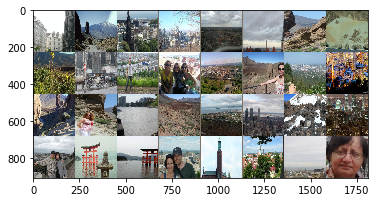

In [22]:
# Verify if the data loading was successful
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch - of size 32 as defined above
out = torchvision.utils.make_grid(inputs)

imshow(out)

In [11]:
# Method defined to train the model
'''
--------------------------------------------------
Input
--------------------------------------------------
model     - Pretrained Resnet 50 Model
criterion - nn.CrossEntropyLoss : normally used when 
            dealing with multi-class classification
optimizer - optim.SGD : Using Stochastic Gradient 
                        Descent to optimize the parameters
scheduler - lr_scheduler : Adjusting the learning 
                           rate depending upon the epochs 
                           - currently set to 7
num_epochs - no. of iterations we want to train 
             the CNN  - currently chosen as 7
--------------------------------------------------
'''
def train_model(model, criterion, optimizer, scheduler, num_epochs=7):
    since = time.time()

# Do a deepcopy of the state_dict of the model  
# state_dict contains the values of weights and the biases stored earlier
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and test phase
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
                
            # initializing the final results required
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [24]:
# To visualize the predicted classes of the images
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [25]:
model_ft = models.resnet50(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 10)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

cuda:0


In [26]:
# Call the Train Model method to train the model
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=7)

Epoch 0/6
----------
train Loss: 0.4540 Acc: 0.8640
test Loss: 0.0738 Acc: 0.9822

Epoch 1/6
----------
train Loss: 0.1891 Acc: 0.9403
test Loss: 0.0448 Acc: 0.9861

Epoch 2/6
----------
train Loss: 0.1443 Acc: 0.9529
test Loss: 0.0460 Acc: 0.9876

Epoch 3/6
----------
train Loss: 0.1313 Acc: 0.9576
test Loss: 0.0352 Acc: 0.9919

Epoch 4/6
----------
train Loss: 0.1119 Acc: 0.9639
test Loss: 0.0327 Acc: 0.9894

Epoch 5/6
----------
train Loss: 0.1060 Acc: 0.9657
test Loss: 0.0311 Acc: 0.9919

Epoch 6/6
----------
train Loss: 0.0962 Acc: 0.9694
test Loss: 0.0289 Acc: 0.9919

Training complete in 73m 59s
Best val Acc: 0.991860


#### Question 1:
As we can see above the <b> accuracy of the model = 99.19% </b> for the test data

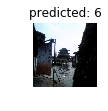

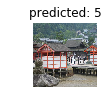

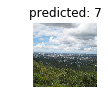

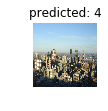

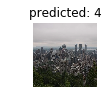

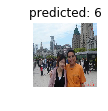

In [27]:
# Call the method to visualize some samples of predictions made by the model
visualize_model(model_ft)

In [28]:
# Length of the entire test dataset
len(image_datasets['test'])

3317

In [29]:
# Length of the entire train dataset
len(image_datasets['train'])

27000

#### Question 2

Below is the <b> Confusion Matrix </b> with the groundtruth and predicted labels in the test dataset on the x and y axes respectively

In [79]:
# Creating the confusion matrix
# Total no. of classes = 10
nb_classes = 10

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    # For the data from the test set
    for i, (inputs, classes) in enumerate(dataloaders['test']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        
        # Take the output from the Resnet Model
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        
        # Create a confusion matriz using the test and predicted values test values as rows and pred values as columns
        for test, pred in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[test.int(), pred.int()] += 1
                
# Converting the torch array to a numpy array
confusion_matrix = confusion_matrix.numpy()
print(confusion_matrix)

[[340.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 391.   0.   0.   0.   0.   0.   0.   1.   0.]
 [  1.   0. 354.   3.   0.   0.   2.   0.   0.   1.]
 [  0.   0.   0. 338.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 341.   0.   0.   3.   0.   1.]
 [  0.   0.   0.   0.   2. 334.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 308.   1.   0.   0.]
 [  0.   0.   0.   0.   2.   0.   0. 314.   0.   0.]
 [  0.   0.   0.   0.   5.   0.   0.   1. 326.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.   0. 244.]]


In [80]:
# Changing the datatype of the values in the confusion matrix to Integer
confusion_matrix.astype(int)

array([[340,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 391,   0,   0,   0,   0,   0,   0,   1,   0],
       [  1,   0, 354,   3,   0,   0,   2,   0,   0,   1],
       [  0,   0,   0, 338,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 341,   0,   0,   3,   0,   1],
       [  0,   0,   0,   0,   2, 334,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 308,   1,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 314,   0,   0],
       [  0,   0,   0,   0,   5,   0,   0,   1, 326,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0, 244]])

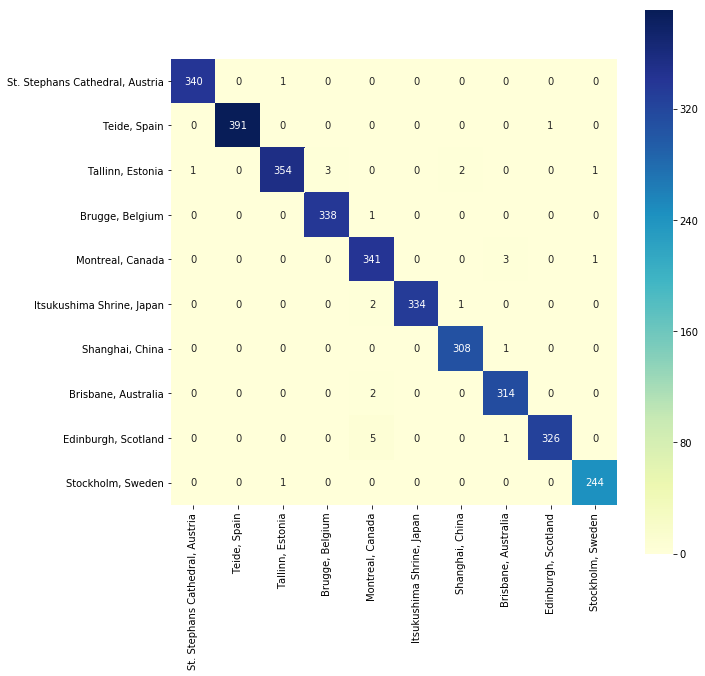

In [111]:
# Plotting the confusion matrix with the heat map to visualize the Confusion Matrix
import seaborn as sns
ticks = np.array(['St. Stephan''s Cathedral, Austria', 'Teide, Spain', 'Tallinn, Estonia', 'Brugge, Belgium',
                 'Montreal, Canada', 'Itsukushima Shrine, Japan', 'Shanghai, China', 'Brisbane, Australia', 
                 'Edinburgh, Scotland', 'Stockholm, Sweden'])
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", square=True, ax=ax, fmt='g', xticklabels = ticks, yticklabels = ticks)

#### Question 3
Below is the <b>Normalized Confusion Matrix</b> with the groundtruth and predicted labels in the test dataset on the x and y axes respectively

In [ ]:
# Normalizing the confusion matrix
normalized_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)

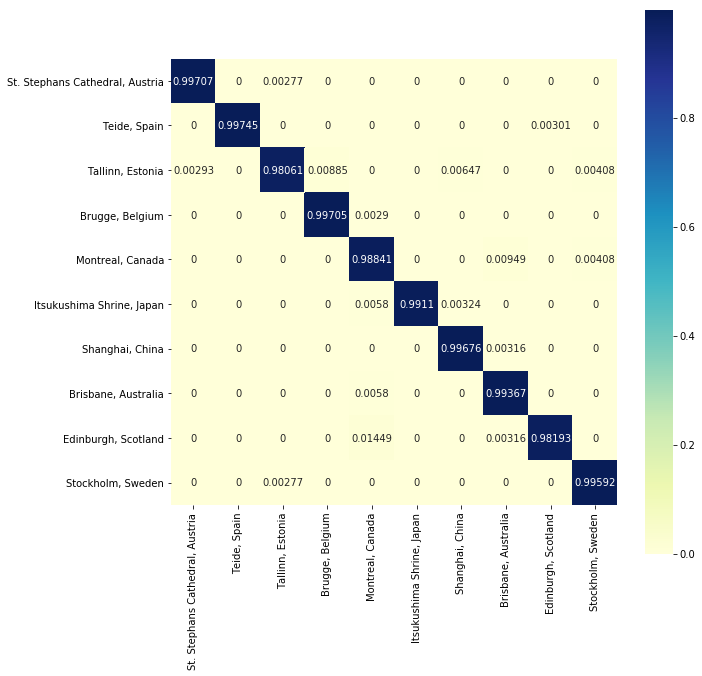

In [112]:
# Plotting the confusion matrix with the heat map to visualize the Confusion Matrix
import numpy as np

# Rounding the values to 5 Decimal places
normalized_confusion_matrix = np.around(normalized_confusion_matrix,decimals=5)
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(normalized_confusion_matrix, annot=True, cmap="YlGnBu", square=True, ax=ax, fmt='g', xticklabels = ticks, yticklabels = ticks)

#### Question 4

As we can see above that the <b>category that is most accurately predicted = Teide, Spain</b> <br>
However, other categories like
1. Brugge, Belgium
2. St. Stephens Cathedra, Australia
3. Shanghai, China 
closely follow in the in the best predicted values

#### Question 5

As we can see above that the <b>category that is least accurately predicted = Talin, Estonia</b> <br>
However, other categories like
1. Edinburgh, Scotland
2. Montreal, Canada
closely follow in the in the best predicted values

#### Question 6

Below is the <b>Precision and Recall</b> and the bar graph of teh same protted for each landmark


In [113]:
# Calculating the Precision and Recall
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 1)
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 0)

In [114]:
print(recall)

[0.99706745 0.997449   0.9806094  0.99705017 0.9884058  0.9910979
 0.99676377 0.9936709  0.9819277  0.9959184 ]


In [115]:
print(precision)

[0.99706745 1.         0.994382   0.99120235 0.97151    1.
 0.9903537  0.984326   0.9969419  0.9918699 ]


In [124]:
Dest_prec_rec = list(zip(ticks,precision,recall))

In [126]:
import pandas as pd
DPR_df = pd.DataFrame(Dest_prec_rec, columns = ['Destination','Precision','Recall'])

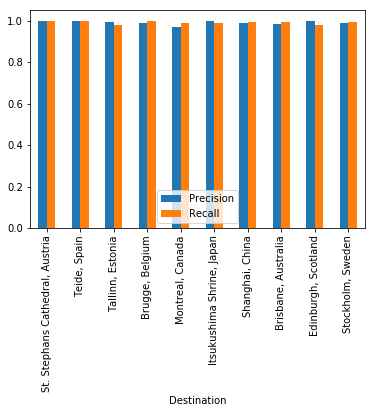

In [136]:
# Plotting the bar graph of Precision and Recall against the landmarks
ax = DPR_df.plot.bar(x="Destination")